In [9]:
import numpy as np
import cv2
from skimage.util import random_noise
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio
import os
from matplotlib.pyplot import figure
import skimage.io
from skimage.restoration import (denoise_wavelet, estimate_sigma)
from tqdm.notebook import tqdm

In [10]:
#------------------------------------
# Plots
#------------------------------------
#Adjust figure sizes
rcParams['figure.figsize'] = [8, 4]
plt.rcParams['figure.dpi'] = 100
# X_axis=np.arange(0,25)
# X_axis1 = X_axis

## Accuracy of Models

In [11]:
accuracy = [91.19, 88.85, 93.04, 87.28, 90.85, 65.00]
model = ['MobileNetV2', 'Resnet50V2', 'InceptResNetV2', 'VGG19', 'InceptionV3', 'EfficientNetV2S']

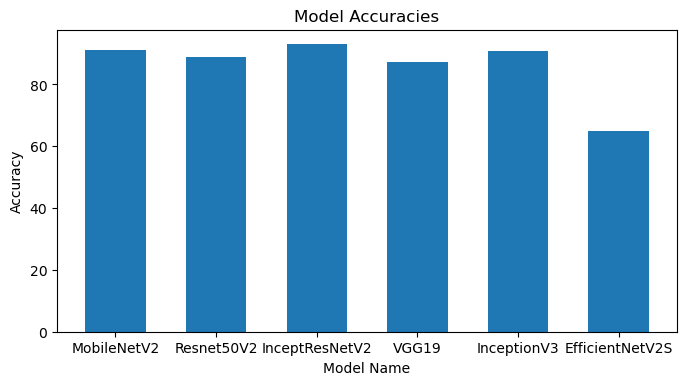

In [12]:
#------------------------------------------------------------
# Plot Mean Squared Error for each image
#------------------------------------------------------------
plt.bar(model, accuracy, 0.6)
#     plt.bar(X_axis4, lst_mse_7x7_filt, 0.2, label='7x7_filt')
plt.xlabel('Model Name')
plt.ylabel('Accuracy')
plt.title('Model Accuracies')
# plt.legend()
plt.show()

## FP32 Precision Load

In [13]:
# Colab_GPU = [0.052, 0.054, 0.078, 0.046, 0.06]
# GPU       = [2.8263, 2.9463, 6.3200, 2.9570, 4.6380]
# NCS2      = [1.9686, 2.0558, 3.1228, 2.1565, 2.0640]
# CPU       = [0.0799, 0.1128, 0.2854, 0.1153, 0.1761]
# NCS2_Rasp = [8.1088, 8.5202, 22.6986, 8.4061, 8.7116]


CPU       = [0.1163, 0.2501, 0.6670, 0.1445, 0.2848, 0.4572]
GPU       = [4.4413, 6.4578, 16.5807, 4.6860, 7.9319, 12.3654]
NCS2      = [2.0132, 2.1107, 3.6791, 2.0608, 2.0712, 3.2036]
NCS2_Rasp = [8.1615, 8.4460, 24.7394, 8.2744, 8.6501, 19.5176]

model = ['MobileNetV2', 'Resnet50V2', 'InceptionResNetV2', 'VGG19', 'InceptionNetV3', 'EfficientNetV2S']

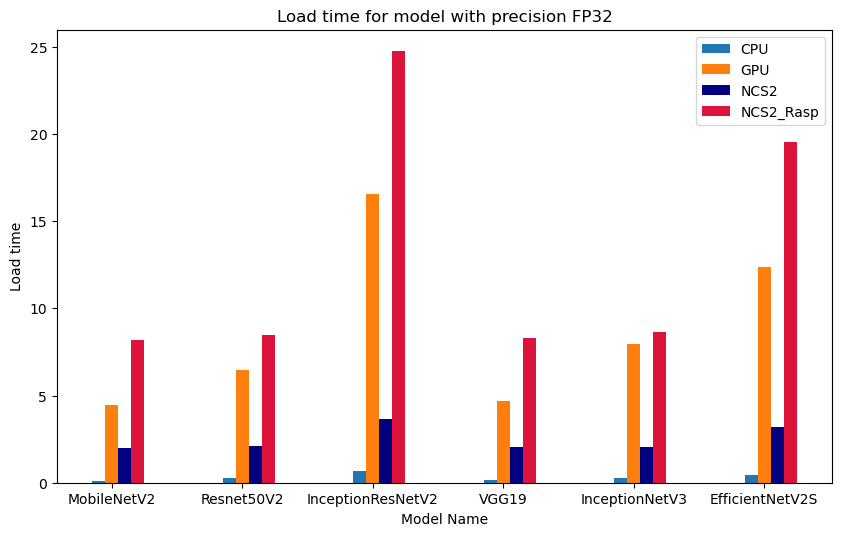

In [14]:
#Adjust figure sizes
rcParams['figure.figsize'] = [10, 6]
plt.rcParams['figure.dpi'] = 100
width = 0.1
X_axis=np.arange(0,6)
X_axis1 = X_axis
X_axis2 = X_axis + width
X_axis3 = X_axis + width*2
X_axis4 = X_axis + width*3

# plt.plot(model, Colab_GPU, marker='o', markerfacecolor='blue', markersize=8, color='skyblue', linewidth=2, label='Colab_GPU')
plt.bar(X_axis1, CPU, 0.1, label='CPU')
plt.bar(X_axis2, GPU, 0.1, label='GPU')
plt.bar(X_axis3, NCS2, color='navy', width=width, label='NCS2')
plt.bar(X_axis4, NCS2_Rasp, color='crimson', width=width, label='NCS2_Rasp')


# plt.bar(X_axis4, lst_mse_7x7_filt, 0.2, label='7x7_filt')
plt.xlabel('Model Name')
plt.ylabel('Load time')
plt.title('Load time for model with precision FP32')
plt.legend()
plt.xticks(X_axis+width, model)
plt.show()

## FP16 Precision

In [15]:
# Colab_GPU = [0.052, 0.054, 0.078, 0.046, 0.06]
# GPU       = [2.7898, 2.8738, 6.2164, 3.2921, 4.6286]
# NCS2      = [1.9186, 2.0364, 2.9767, 2.1031, 2.0201]
# CPU       = [0.1172, 0.4334, 0.9910, 0.3482, 0.4941]
# NCS2_Rasp = [7.8546, 7.0414, 19.0261, 7.1221, 7.1066]

CPU       = [0.0699, 0.1686, 0.4907, 0.1019, 0.2049, 0.3893]
GPU       = [3.7681, 5.4119, 15.6516, 4.5191, 7.6198, 12.1733]
NCS2      = [1.9324, 1.9495, 3.3887, 2.0201, 2.0505, 3.0130]
NCS2_Rasp = [6.8928, 6.8800, 19.0833, 7.7566, 7.0261, 19.0142]

model = ['MobileNetV2', 'Resnet50V2', 'InceptionResNetV2', 'VGG19', 'InceptionNetV3', 'EfficientNetV2S']

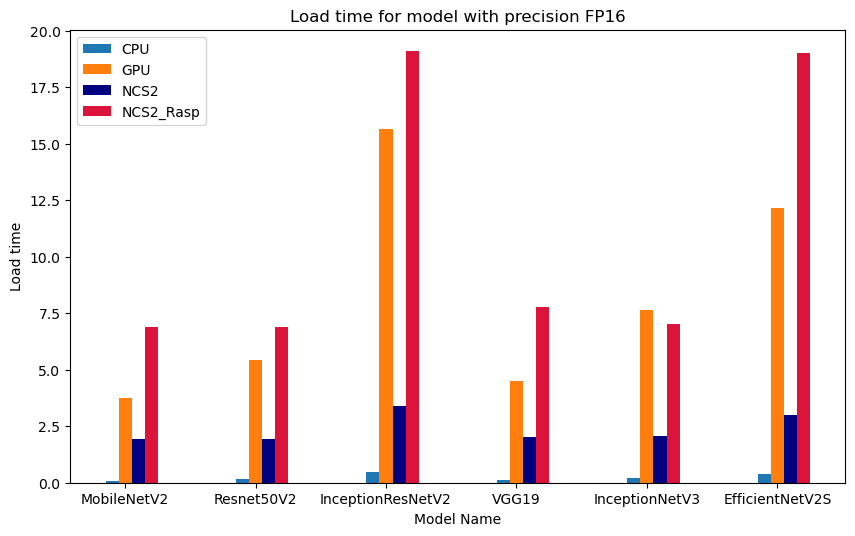

In [16]:
#Adjust figure sizes
rcParams['figure.figsize'] = [10, 6]
plt.rcParams['figure.dpi'] = 100
width = 0.1
X_axis=np.arange(0,6)
X_axis1 = X_axis
X_axis2 = X_axis + width
X_axis3 = X_axis + width*2
X_axis4 = X_axis + width*3

# plt.plot(model, Colab_GPU, marker='o', markerfacecolor='blue', markersize=8, color='skyblue', linewidth=2, label='Colab_GPU')
plt.bar(X_axis1, CPU, 0.1, label='CPU')
plt.bar(X_axis2, GPU, 0.1, label='GPU')
plt.bar(X_axis3, NCS2, color='navy', width=width, label='NCS2')
plt.bar(X_axis4, NCS2_Rasp, color='crimson', width=width, label='NCS2_Rasp')


# plt.bar(X_axis4, lst_mse_7x7_filt, 0.2, label='7x7_filt')
plt.xlabel('Model Name')
plt.ylabel('Load time')
plt.title('Load time for model with precision FP16')
plt.legend()
plt.xticks(X_axis+width, model)
plt.show()

# BKUP

## FP32 Precision Load

In [6]:
# Colab_GPU = [0.052, 0.054, 0.078, 0.046, 0.06]
GPU       = [2.8263, 2.9463, 6.3200, 2.9570, 4.6380]
NCS2      = [1.9686, 2.0558, 3.1228, 2.1565, 2.0640]
CPU       = [0.0799, 0.1128, 0.2854, 0.1153, 0.1761]
NCS2_Rasp = [8.1088, 8.5202, 22.6986, 8.4061, 8.7116]

model = ['MobileNetV2', 'Resnet50V2', 'InceptionResNetV2', 'VGG19', 'InceptionNetV3']

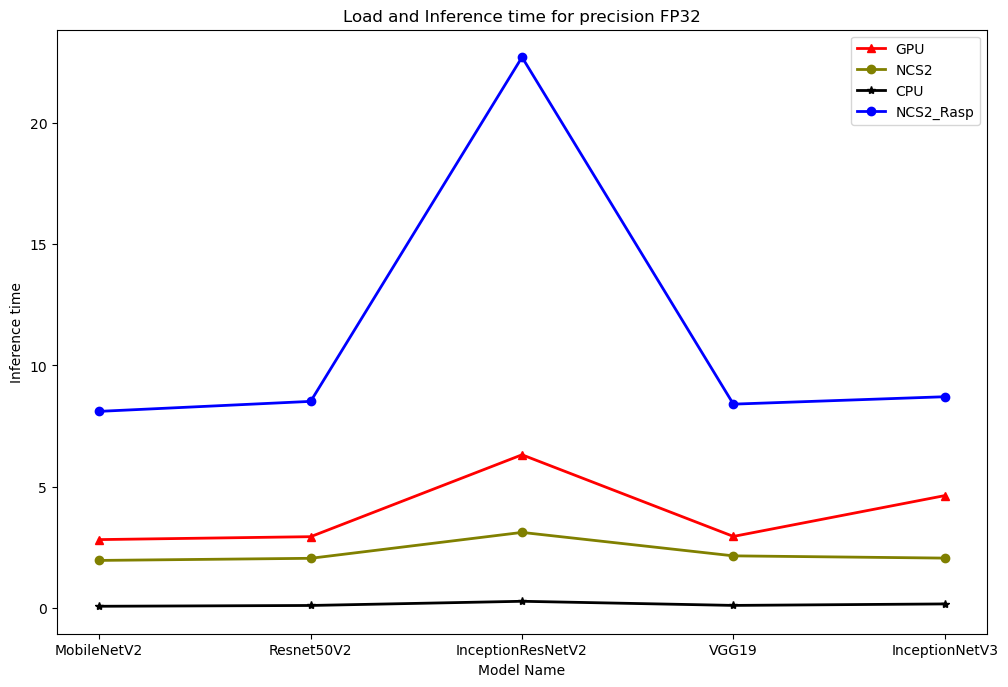

In [7]:
#------------------------------------------------------------
# Plot Mean Squared Error for each image
#------------------------------------------------------------
# plt.plot(model, Colab_GPU, marker='o', markerfacecolor='blue', markersize=8, color='skyblue', linewidth=2, label='Colab_GPU')
plt.plot(model, GPU, color='red', marker='^', linewidth=2, label='GPU')
plt.plot(model, NCS2, color='olive', marker='o', linewidth=2, label='NCS2')
plt.plot(model, CPU, color='black', marker='*', linewidth=2, label='CPU')
plt.plot(model, NCS2_Rasp, color='blue', marker='o', linewidth=2, label='NCS2_Rasp')

# plt.bar(X_axis4, lst_mse_7x7_filt, 0.2, label='7x7_filt')
plt.xlabel('Model Name')
plt.ylabel('Inference time')
plt.title('Load and Inference time for precision FP32')
plt.legend()
plt.show()

## FP16 Precision

In [8]:
# Colab_GPU = [0.052, 0.054, 0.078, 0.046, 0.06]
GPU       = [2.7898, 2.8738, 6.2164, 3.2921, 4.6286]
NCS2      = [1.9186, 2.0364, 2.9767, 2.1031, 2.0201]
CPU       = [0.1172, 0.4334, 0.9910, 0.3482, 0.4941]
NCS2_Rasp = [7.8546, 7.0414, 19.0261, 7.1221, 7.1066]

model = ['MobileNetV2', 'Resnet50V2', 'InceptionResNetV2', 'VGG19', 'InceptionNetV3']

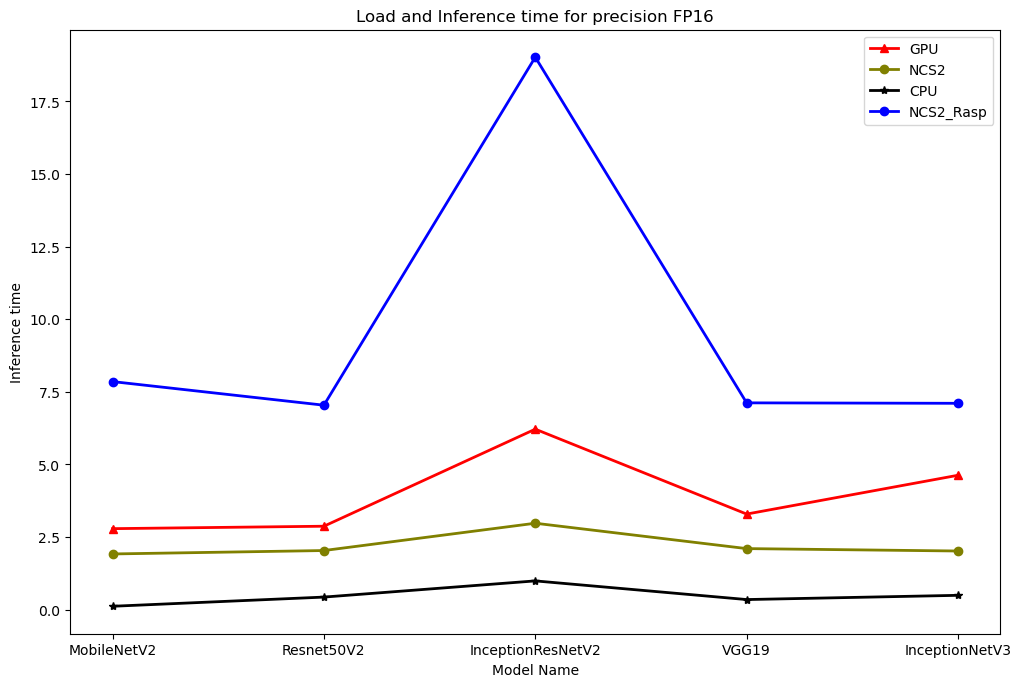

In [9]:
#------------------------------------------------------------
# Plot Mean Squared Error for each image
#------------------------------------------------------------
# plt.plot(model, Colab_GPU, marker='o', markerfacecolor='blue', markersize=8, color='skyblue', linewidth=2, label='Colab_GPU')
plt.plot(model, GPU, color='red', marker='^', linewidth=2, label='GPU')
plt.plot(model, NCS2, color='olive', marker='o', linewidth=2, label='NCS2')
plt.plot(model, CPU, color='black', marker='*', linewidth=2, label='CPU')
plt.plot(model, NCS2_Rasp, color='blue', marker='o', linewidth=2, label='NCS2_Rasp')

# plt.bar(X_axis4, lst_mse_7x7_filt, 0.2, label='7x7_filt')
plt.xlabel('Model Name')
plt.ylabel('Inference time')
plt.title('Load and Inference time for precision FP16')
plt.legend()
plt.show()

## Inference time comparision After Pruning

In [9]:
# Colab_GPU = [0.052, 0.054, 0.078, 0.046, 0.06]
GPU = [0.0074, 0.0225, 0.0250]
NCS2 = [0.0328, 0.0658, 0.1120]
CPU = [0.0091, 0.0615, 0.0600]
NCS2_Rasp = [0.0556, 0.083, 0.147]

model = ['MobileNetV2', 'Resnet50V2', 'InceptionResNetV2']

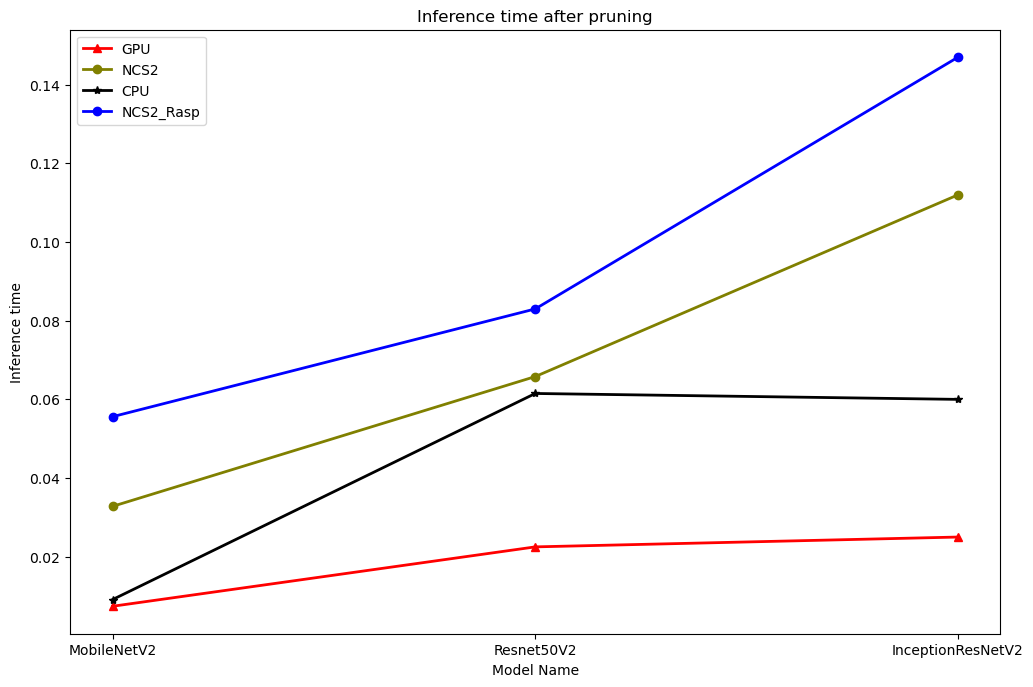

In [10]:
#------------------------------------------------------------
# Plot Mean Squared Error for each image
#------------------------------------------------------------
# plt.plot(model, Colab_GPU, marker='o', markerfacecolor='blue', markersize=8, color='skyblue', linewidth=2, label='Colab_GPU')
plt.plot(model, GPU, color='red', marker='^', linewidth=2, label='GPU')
plt.plot(model, NCS2, color='olive', marker='o', linewidth=2, label='NCS2')
plt.plot(model, CPU, color='black', marker='*', linewidth=2, label='CPU')
plt.plot(model, NCS2_Rasp, color='blue', marker='o', linewidth=2, label='NCS2_Rasp')

# plt.bar(X_axis4, lst_mse_7x7_filt, 0.2, label='7x7_filt')
plt.xlabel('Model Name')
plt.ylabel('Inference time')
plt.title('Inference time after pruning')
plt.legend()
plt.show()